Download and crop images

In [5]:
# Provided by ChatGPT
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
import os

def download_image(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        return Image.open(BytesIO(response.content))
    except requests.exceptions.RequestException as e:
        print(f"Failed to download {url}: {e}")
        return None

def crop_and_save_image(image, bbox, save_path):
    width, height = image.size
    left = bbox[0] * width
    top = bbox[2] * height
    right = bbox[1] * width
    bottom = bbox[3] * height
    
    cropped_image = image.crop((left, top, right, bottom))
    cropped_image.save(save_path)

def process_csv(file_path, output_dir):
    # Read the first 10 lines of the CSV file
    df = pd.read_csv(file_path, header=None, nrows=10)
    
    # Iterate through each row in the DataFrame
    for index, row in df.iterrows():
        for i in range(0, len(row) - 5, 5):
            url = row[i]
            # Ensure the value is a string before checking if it is a valid URL
            if not isinstance(url, str) or not url.startswith("http"): 
                print(f"Skipping invalid URL: {url}")
                continue
            
            bbox = [row[i+1], row[i+2], row[i+3], row[i+4]]
            
            # Download the image
            image = download_image(url)
            if image is None:
                continue
            
            # Create output directory if it doesn't exist
            os.makedirs(output_dir, exist_ok=True)
            
            # Define save path for cropped image
            save_path = os.path.join(output_dir, f"cropped_face_{index}_{i//5}.jpg")
            
            # Crop and save the image
            crop_and_save_image(image, bbox, save_path)
            print(f"Saved cropped face to {save_path}")





if __name__ == "__main__":
    # Path to your CSV file
    csv_file_path = "./FEC_dataset/faceexp-comparison-data-train-public.csv"
    # Directory to save cropped face images
    output_directory = "cropped_faces"
    
    process_csv(csv_file_path, output_directory)

Saved cropped face to cropped_faces\cropped_face_0_0.jpg
Saved cropped face to cropped_faces\cropped_face_0_1.jpg
Saved cropped face to cropped_faces\cropped_face_0_2.jpg
Skipping invalid URL: ONE_CLASS_TRIPLET
Skipping invalid URL: 321402
Saved cropped face to cropped_faces\cropped_face_1_0.jpg
Saved cropped face to cropped_faces\cropped_face_1_1.jpg
Saved cropped face to cropped_faces\cropped_face_1_2.jpg
Skipping invalid URL: TWO_CLASS_TRIPLET
Skipping invalid URL: 321601
Saved cropped face to cropped_faces\cropped_face_2_0.jpg
Saved cropped face to cropped_faces\cropped_face_2_1.jpg
Saved cropped face to cropped_faces\cropped_face_2_2.jpg
Skipping invalid URL: ONE_CLASS_TRIPLET
Skipping invalid URL: 322102
Saved cropped face to cropped_faces\cropped_face_3_0.jpg
Saved cropped face to cropped_faces\cropped_face_3_1.jpg
Saved cropped face to cropped_faces\cropped_face_3_2.jpg
Skipping invalid URL: TWO_CLASS_TRIPLET
Skipping invalid URL: 321601
Saved cropped face to cropped_faces\crop

Load Grayscale image and 2D fourier transform it

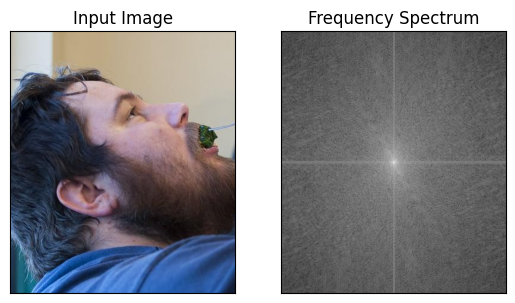

In [10]:
from PIL import Image
import PIL
import PIL.ImageOps
import numpy as np
from matplotlib import pyplot as plt

img = Image.open("./cropped_faces/cropped_face_6_1.jpg")
grayscale = PIL.ImageOps.grayscale(img)
# grayscale.show()
fourier_transformed = np.fft.fft2(grayscale)
fourier_transformed = np.fft.fftshift(fourier_transformed)
fourier_transformed = 20*np.log(np.abs(fourier_transformed))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(fourier_transformed, cmap = 'gray')
plt.title('Frequency Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
